In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import glob

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

### Analysis of Divergent Virus simulations

This script should work for both Illumina and Nanopore simulations (depending on the configurations for data location set in the cell below)

In [62]:
data_type = 'ont' #'ilmn'

baseline_data = "./data/BASELINE/virus_simulation/"
#new_data = "./data/NEW/virus_simulation-2023_01_22_clobbered_compressed_nt_and_nr_k_31_thresh_0-9_scaled_1000/" 
new_data = "./data/NEW/virus_simulation-2021_compressed_new_approach/" 
metric = 'rpm' #bpm if ONT, rpm if ILMN

#for nanopore
baseline_data = "./data/BASELINE/virus_simulation_nanopore/"
new_data = "./data/NEW/virus_simulation_nanopore-2021_compressed_new_approach/"
metric = 'bpm' #bpm if ONT, rpm if ILMN

manifest = {'lassa_virus': 'Mammarenavirus', 
            'nipah_virus': 'Henipavirus',
            'rhinovirus_C': 'Enterovirus',
            'sars_cov_2': 'Betacoronavirus',
            'human_betaherpesvirus_5':'Cytomegalovirus',
            'hepatitis_B_virus': 'Orthohepadnavirus'}

In [63]:
def synthesize_virus_results(directory, metric):
    
    all_results = {}
    min_results = {}
    for file in glob.glob(directory + "*.csv"):
        
        print("---")
        print(file)
        
        parsed_name = file.split('/')[-1].split('_')
        divergence = int(parsed_name[-3].split('m')[1])
        virus_name = '_'.join(parsed_name[0:-3])

        if virus_name not in all_results.keys():
            all_results[virus_name] = {}
            min_results[virus_name] = {}
            min_results[virus_name]['min_detection_nt'] = 0
            min_results[virus_name]['min_detection_nr'] = 0

        all_results[virus_name][divergence] = {}

        try:
            input_df = pd.read_csv(file)
            genus_df = input_df[input_df.tax_level == 2]

            genus_df = input_df[input_df.name == manifest[virus_name]]
            print(manifest[virus_name])
            #print(genus_df[['name', 'nt_rpm', 'nr_rpm']].head())

            nt_rpm = genus_df['nt_' + metric][0]
            nr_rpm = genus_df['nr_' + metric][0]
            
            print("finished TRY statement")

        except:
            nt_rpm = 0
            nr_rpm = 0
        
        all_results[virus_name][divergence]['nt_' + metric]=nt_rpm
        all_results[virus_name][divergence]['nr_' + metric]=nr_rpm

        if nt_rpm > 0:
            if divergence > min_results[virus_name]['min_detection_nt']:
                min_results[virus_name]['min_detection_nt'] = divergence
        if nr_rpm > 0:
            if divergence > min_results[virus_name]['min_detection_nr']:
                min_results[virus_name]['min_detection_nr'] = divergence

    print(all_results)
    
    df_list = []
    df_names = []
    for i in all_results.keys():
        df_names.append(i)
        df_names.append(i)
        df_list.append(pd.DataFrame(all_results[i]))

    full_df = pd.concat(df_list)
    full_df.index = [df_names[i] + '_' + full_df.index[i] for i in range(len(full_df.index))]
    full_df
    print(full_df)
    
    #plot of minimum divergences
    min_res_df = pd.DataFrame(min_results)
    print(min_res_df)
    min_res_df.plot(kind='bar')
    
    return([all_results, full_df, min_results])

---
./data/BASELINE/virus_simulation_nanopore/sars_cov_2_m15_7X_report.csv
Betacoronavirus
finished TRY statement
---
./data/BASELINE/virus_simulation_nanopore/nipah_virus_m05_7X_report.csv
Henipavirus
finished TRY statement
---
./data/BASELINE/virus_simulation_nanopore/hepatitis_B_virus_m30_7X_report.csv
Orthohepadnavirus
finished TRY statement
---
./data/BASELINE/virus_simulation_nanopore/lassa_virus_m20_7X_report.csv
Mammarenavirus
finished TRY statement
---
./data/BASELINE/virus_simulation_nanopore/human_betaherpesvirus_5_m10_7X_report.csv
Cytomegalovirus
finished TRY statement
---
./data/BASELINE/virus_simulation_nanopore/hepatitis_B_virus_m40_7X_report.csv
Orthohepadnavirus
finished TRY statement
---
./data/BASELINE/virus_simulation_nanopore/rhinovirus_C_m15_7X_report.csv
Enterovirus
finished TRY statement
---
./data/BASELINE/virus_simulation_nanopore/lassa_virus_m50_7X_report.csv
---
./data/BASELINE/virus_simulation_nanopore/hepatitis_B_virus_m50_7X_report.csv
---
./data/BASELIN

rhinovirus_C_nr_bpm                   0.0       0.0  
                  sars_cov_2  nipah_virus  hepatitis_B_virus  lassa_virus  \
min_detection_nt          15           15                 20           20   
min_detection_nr          45           40                 45           40   

                  human_betaherpesvirus_5  rhinovirus_C  
min_detection_nt                       20            20  
min_detection_nr                       50            40  
---
./data/NEW/virus_simulation_nanopore-2021_compressed_new_approach/sars_cov_2_m15_7X_report.csv
Betacoronavirus
finished TRY statement
---
./data/NEW/virus_simulation_nanopore-2021_compressed_new_approach/nipah_virus_m05_7X_report.csv
Henipavirus
finished TRY statement
---
./data/NEW/virus_simulation_nanopore-2021_compressed_new_approach/hepatitis_B_virus_m30_7X_report.csv
Orthohepadnavirus
finished TRY statement
---
./data/NEW/virus_simulation_nanopore-2021_compressed_new_approach/lassa_virus_m20_7X_report.csv
Mammarenavirus
finis

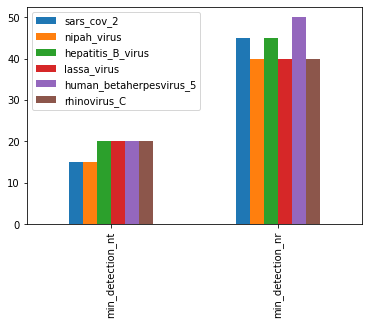

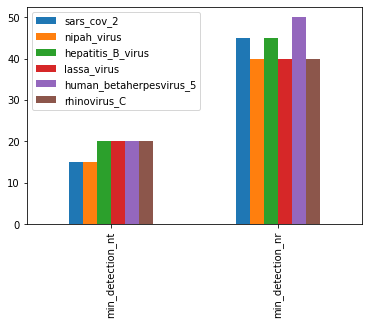

In [64]:
baseline_results = synthesize_virus_results(baseline_data, metric)
new_results = synthesize_virus_results(new_data, metric)

In [65]:
# palette from here: https://flatuicolors.com/palette/us
official_colors = ['#55efc4','#00b894', #greens 
                   '#81ecec','#00cec9', #teals
                   '#74b9ff','#0984e3', #blues
                   '#a29bfe','#6c5ce7', #purples
                   '#ffeaa7','#fdcb6e', #yellows
                   '#fab1a0', '#e17055', #oranges
                   '#ff7675', '#d63031', #reds
                   '#fd79a8', '#e84393', #pinks
                   '#dfe6e9', '#b2bec3', '#636e72', '#2d3436' #greys
                  ]

lassa_virus


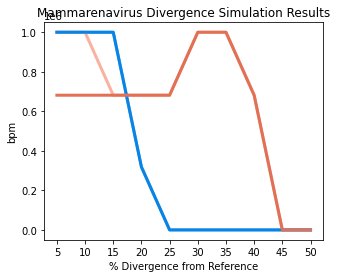

nipah_virus


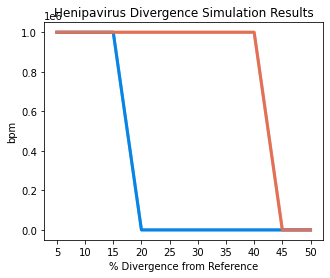

rhinovirus_C


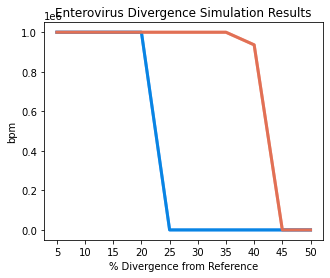

sars_cov_2


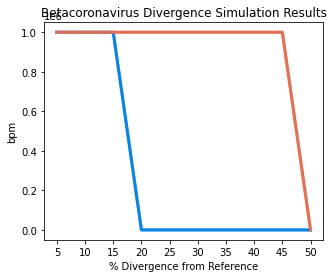

human_betaherpesvirus_5


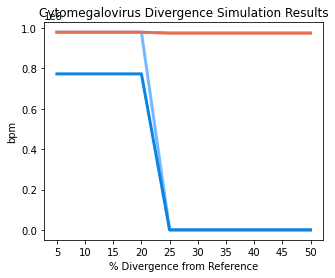

hepatitis_B_virus


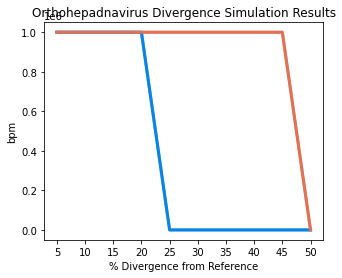

"a=(baseline_full.loc[['sars_cov_2_nt_' + metric, 'sars_cov_2_nr_' + metric]]).transpose().plot(color = [official_colors[4], official_colors[10]], lw=3, figsize=(6,4)) #style={'nipah_virus_nt_rpm': '*-r', 'nipah_virus_nr_rpm': '*:r'}\nnew_full.loc[['sars_cov_2_nt_' + metric, 'sars_cov_2_nr_' + metric]].transpose().plot(color = [official_colors[5], official_colors[11]], ax=a, lw=3) #style={'nipah_virus_nt_rpm': '*-b', 'nipah_virus_nr_rpm': '*:b'}, \nplt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])\nplt.xlabel('% Divergence from Reference')\nplt.ylabel(metric)\nplt.show()\n\na=(baseline_full.loc[['sars_cov_2_nt_' + metric, 'sars_cov_2_nr_' + metric]]).transpose().plot(color = [official_colors[4], official_colors[10]], lw=3, figsize=(6,4)) #style={'nipah_virus_nt_rpm': '*-r', 'nipah_virus_nr_rpm': '*:r'}\nnew_full.loc[['sars_cov_2_nt_' + metric, 'sars_cov_2_nr_' + metric]].transpose().plot(color = [official_colors[5], official_colors[11]], ax=a, lw=3) #style={'nipah_virus_nt_rpm': '*-b

In [71]:
# Figure 3A (or S5A, if nanopore data)

baseline_full = baseline_results[1]
baseline_full.fillna(0, inplace=True)
new_full = new_results[1]
new_full.fillna(0, inplace=True)

for k in manifest.keys():
    print(k)
    #a=(baseline_full.loc[[k+'_nt_' + metric, k+'_nr_' + metric]]).transpose().plot(color = [official_colors[4], official_colors[10]], lw=3, figsize=(6,4)) 
    #new_full.loc[[k+'_nt_' + metric, k+'_nr_' + metric]].transpose().plot(color = [official_colors[5], official_colors[11]], ax=a, lw=3)  
    t1 = baseline_full.loc[[k+'_nt_' + metric, k+'_nr_' + metric]]
    t1.index = ['NT original', 'NR original']
    t2 = new_full.loc[[k+'_nt_' + metric, k+'_nr_' + metric]]
    t2.index = ['NT compressed', 'NR compressed']
    a=(t1).transpose().plot(color = [official_colors[4], official_colors[10]], lw=3, figsize=(5,4)) 
    t2.transpose().plot(color = [official_colors[5], official_colors[11]], ax=a, lw=3)  
    plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
    plt.xlabel('% Divergence from Reference')
    plt.ylabel(metric)
    plt.title(manifest[k] + " Divergence Simulation Results")
    plt.legend().set_visible(False)
    plt.savefig("./div_vir_" + k + "_" + data_type + ".pdf")
    plt.show()


'''a=(baseline_full.loc[['sars_cov_2_nt_' + metric, 'sars_cov_2_nr_' + metric]]).transpose().plot(color = [official_colors[4], official_colors[10]], lw=3, figsize=(6,4)) #style={'nipah_virus_nt_rpm': '*-r', 'nipah_virus_nr_rpm': '*:r'}
new_full.loc[['sars_cov_2_nt_' + metric, 'sars_cov_2_nr_' + metric]].transpose().plot(color = [official_colors[5], official_colors[11]], ax=a, lw=3) #style={'nipah_virus_nt_rpm': '*-b', 'nipah_virus_nr_rpm': '*:b'}, 
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.xlabel('% Divergence from Reference')
plt.ylabel(metric)
plt.show()

a=(baseline_full.loc[['sars_cov_2_nt_' + metric, 'sars_cov_2_nr_' + metric]]).transpose().plot(color = [official_colors[4], official_colors[10]], lw=3, figsize=(6,4)) #style={'nipah_virus_nt_rpm': '*-r', 'nipah_virus_nr_rpm': '*:r'}
new_full.loc[['sars_cov_2_nt_' + metric, 'sars_cov_2_nr_' + metric]].transpose().plot(color = [official_colors[5], official_colors[11]], ax=a, lw=3) #style={'nipah_virus_nt_rpm': '*-b', 'nipah_virus_nr_rpm': '*:b'}, 
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.xlabel('% Divergence from Reference')
plt.ylabel(metric)
plt.show()
'''

{'new_nt': {'sars_cov_2': 15, 'nipah_virus': 15, 'hepatitis_B_virus': 20, 'lassa_virus': 20, 'human_betaherpesvirus_5': 20, 'rhinovirus_C': 20}, 'baseline_nt': {'sars_cov_2': 15, 'nipah_virus': 15, 'hepatitis_B_virus': 20, 'lassa_virus': 20, 'human_betaherpesvirus_5': 20, 'rhinovirus_C': 20}, 'new_nr': {'sars_cov_2': 45, 'nipah_virus': 40, 'hepatitis_B_virus': 45, 'lassa_virus': 40, 'human_betaherpesvirus_5': 50, 'rhinovirus_C': 40}, 'baseline_nr': {'sars_cov_2': 45, 'nipah_virus': 40, 'hepatitis_B_virus': 45, 'lassa_virus': 40, 'human_betaherpesvirus_5': 50, 'rhinovirus_C': 40}}


Text(0, 0.5, '% Divergence - Limit of Detection')

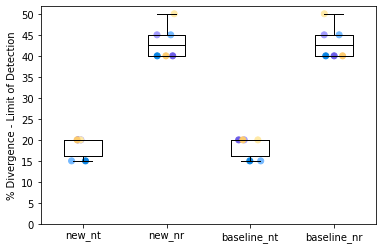

In [67]:
# Figure 3B (or S5A, if nanopore data)

min_results_baseline = baseline_results[2]
min_results_new = new_results[2]
min_results_new

all_mins = {}

for i in ['nt', 'nr']:
    all_mins['new_'+i] = {}
    all_mins['baseline_'+i] = {}
    
    for j in min_results_new:
        all_mins['new_'+i][j] = min_results_new[j]['min_detection_' + i]
        
    for j in min_results_baseline:
        all_mins['baseline_'+i][j] = min_results_baseline[j]['min_detection_' + i]

print(all_mins)
lod_df = pd.DataFrame(all_mins)


lod_df_column_order = ['new_nt', 'new_nr', 'baseline_nt', 'baseline_nr']
lod_df[lod_df_column_order].boxplot(showfliers=False, color='black', figsize=(6,4))
for i, d in enumerate(lod_df[lod_df_column_order]):
    y = lod_df[d]
    x = np.random.normal(i + 1, 0.08, len(y))
    plt.scatter(x, y, color = official_colors[4:10])
plt.grid(False)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
#plt.yticks([0, 10, 20, 30, 40, 50, 60])
plt.ylabel('% Divergence - Limit of Detection')
#plt.title('Limit of Detection Across All \n Simulated Divergent Viruses')


,NT compressed,NT original,NR compressed,NR original
sars_cov_2,15,15,45,45
nipah_virus,15,15,40,40
hepatitis_B_virus,20,20,45,45
lassa_virus,20,20,40,40
human_betaherpesvirus_5,20,20,50,50
rhinovirus_C,20,20,40,40


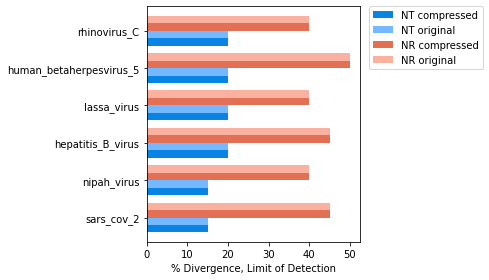

In [68]:
lod_df2 = lod_df
#lod_df2.index = [manifest[i] for i in lod_df.index]
lod_df2.columns = ['NT compressed', 'NT original', 'NR compressed', 'NR original']
lod_df2.plot.barh(color = [official_colors[5], official_colors[4], official_colors[11],  official_colors[10]], figsize=(7,4), width=.8)
plt.xlabel("% Divergence, Limit of Detection")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.tight_layout()
plt.savefig("./divergence_lod_" + data_type + ".pdf")
lod_df

In [69]:
# From Text...
# "the median limit of detection using the compressed database was XX (range XX - XX) for NT 
# and XX (range XX - XX) for NR"

print("NT limit of detection NEW: ")
print(str(np.mean(lod_df['new_nt'])) + ' (range = ' + str(np.min(lod_df['new_nt'])) + ' - ' + str(np.max(lod_df['new_nt'])) + ')')

print("NR limit of detection NEW: ")
print(str(np.mean(lod_df['new_nr'])) + ' (range = ' + str(np.min(lod_df['new_nr'])) + ' - ' + str(np.max(lod_df['new_nr'])) + ')')



print("NT limit of detection OLD: ")
print("NT: " + str(np.mean(lod_df['baseline_nt'])) + ', (range = ' + str(np.min(lod_df['baseline_nt'])) + ' - ' + str(np.max(lod_df['baseline_nt']))+ ')')

print("NR limit of detection OLD: ")
print("NR: " + str(np.mean(lod_df['baseline_nr'])) + ', (range = ' + str(np.min(lod_df['baseline_nr'])) + ' - ' + str(np.max(lod_df['baseline_nr']))+ ')')




NT limit of detection NEW: 


KeyError: 'new_nt'